In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
date = '2020-05-05'

In [3]:
first_date = '2020-03-03'
first_recovered = '2020-03-17'

# contamos los días considerados con la siguiente instrucción
total_days = (pd.to_datetime(date)-pd.to_datetime(first_date)).days
total_days

63

In [4]:
dataTotalRegion = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/"+date+"-CasosConfirmados-totalRegional.csv", index_col='Region')
dataTotalRegion.index

Index(['Arica  y  Parinacota', 'Tarapaca', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaiso', 'Metropolitana', 'O'Higgins', 'Maule',
       'Nuble', 'Biobio', 'Araucania', 'Los  Rios', 'Los  Lagos', 'Aysen',
       'Magallanes', 'Total'],
      dtype='object', name='Region')

In [5]:
columnas = list(dataTotalRegion.columns.values)
columnas

['Casos  totales  acumulados',
 'Casos  nuevos  totales',
 'Casos  nuevos  con  sintomas',
 'Casos  nuevos  sin  sintomas*',
 'Fallecidos',
 '%  Total']

In [6]:
dataTotalRegion[columnas[0:2]].head(5)

Casos  totales  acumulados  Casos  nuevos  totales
Region                                                                  
Arica  y  Parinacota                         315                       7
Tarapaca                                     322                      27
Antofagasta                                  811                      51
Atacama                                       78                       8
Coquimbo                                      97                       6

In [7]:
dataTotalRegion[columnas[0:2]].tail(4)

Casos  totales  acumulados  Casos  nuevos  totales
Region                                                        
Los  Lagos                         525                       1
Aysen                                7                       0
Magallanes                         809                      14
Total                            22016                    1317

In [8]:
dataTotalRegion[columnas[0:2]].iloc[3:8]


Casos  totales  acumulados  Casos  nuevos  totales
Region                                                           
Atacama                                78                       8
Coquimbo                               97                       6
Valparaiso                            687                      31
Metropolitana                       14707                    1179
O'Higgins                             136                       5

In [9]:
data = pd.DataFrame()

In [10]:
data['nuevosConfirmados'] = dataTotalRegion[columnas[0]]
data['totalConfirmados'] = dataTotalRegion[columnas[1]]
data['Fallecidos'] = dataTotalRegion[columnas[2]]


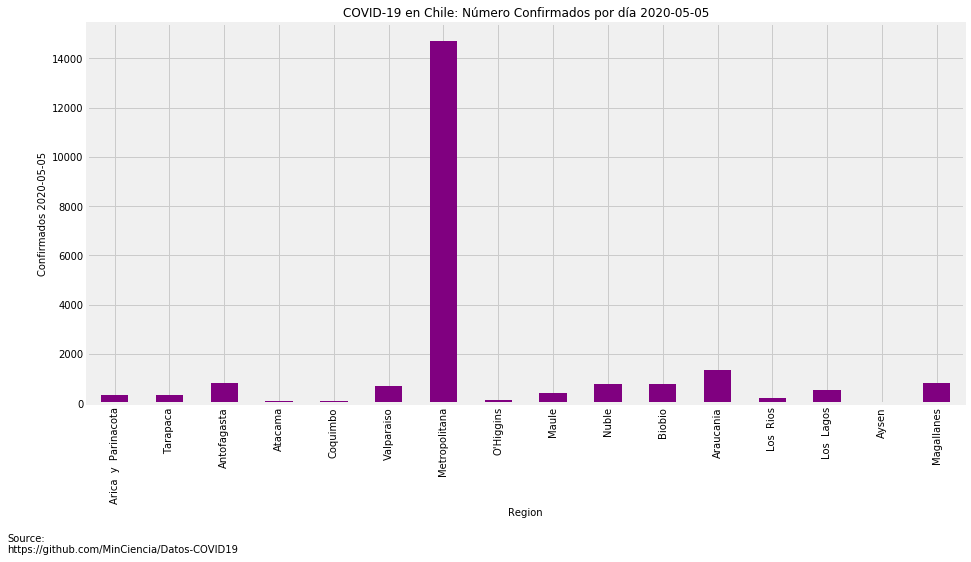

In [11]:
fig, ax = plt.subplots(tight_layout=False,figsize=(14,7))

scale = 'linear'

data['nuevosConfirmados'].iloc[:-1].plot(ax=ax, kind="bar", color='purple')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número Confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Confirmados '+date, fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(date+'-COVID-19-Chile-Confirmados-Region.png', bbox_inches='tight', format='png', dvi=700)

In [12]:
def my_tags(data,scale,fontsize,ypos,color):
  for i, val in enumerate(data):
    if val > 0:
      if scale == 'log': y_position = val*ypos 
      elif scale == 'linear': y_position = val + ypos
      ax.text(i-len(str(i))*0.1, y_position, str(int(val)), fontsize=fontsize,
            bbox=dict(boxstyle="square",
                    alpha=0.5,
                    fc=color,))


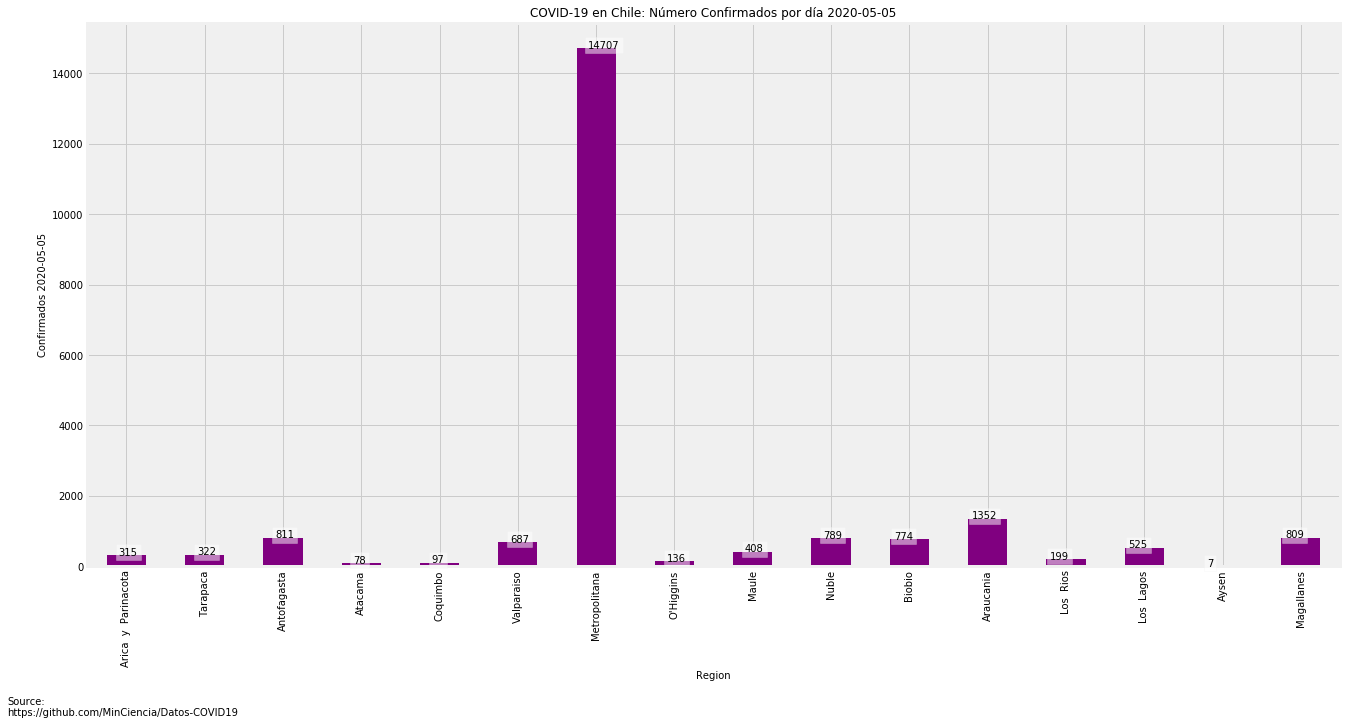

In [13]:
fig, ax = plt.subplots(tight_layout=False,figsize=(20,10))

scale = 'linear'

data['nuevosConfirmados'].iloc[:-1].plot(ax=ax, kind="bar", color='purple')

# llamamos a la función my_tags, con fontsize = 10, 
# ypos = 1.1 (esta posición es relativa al valor de cada dato. ypos = 1 coloca la etiqueta sobre el valor del dato)
# escogimos el color blanco 'white'

fontsize = 10
ypos = 1.1
my_tags(data['nuevosConfirmados'].iloc[:-1],scale,fontsize,ypos,'white')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número Confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Confirmados '+date, fontsize='medium')

#  el gráfico se almacena en formato .png 

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')

# definimos un nombre de archivo considerando la fecha utilizada 'date' (que es texto)

filename = date+'-COVID-19-Chile-Confirmados-Region.png'
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)



In [16]:
dataTotal = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv", index_col=0)
dataTotal.index

Index(['Casos nuevos con sintomas', 'Casos totales', 'Casos recuperados',
       'Fallecidos', 'Casos activos', 'Casos nuevos sin sintomas',
       'Casos nuevos totales'],
      dtype='object', name='Fecha')

In [21]:
columnas = list(dataTotal.columns.values)


In [23]:
dataRec = dataTotal.loc['Casos recuperados']
dataNew = dataTotal.loc['Casos nuevos totales']
dataCum = dataTotal.loc['Casos totales']
dataDeath = dataTotal.loc['Fallecidos']

In [24]:
def my_tags(data,scale,fontsize,ypos,color):
  for i, val in enumerate(data):
    if val > 0:
      if scale == 'log': y_position = val*ypos 
      elif scale == 'linear': y_position = val + ypos
      ax.text(i-len(str(i))*0.1, y_position, str(int(val)), fontsize=fontsize,
            bbox=dict(boxstyle="square",
                    alpha=0.5,
                    fc=color,))

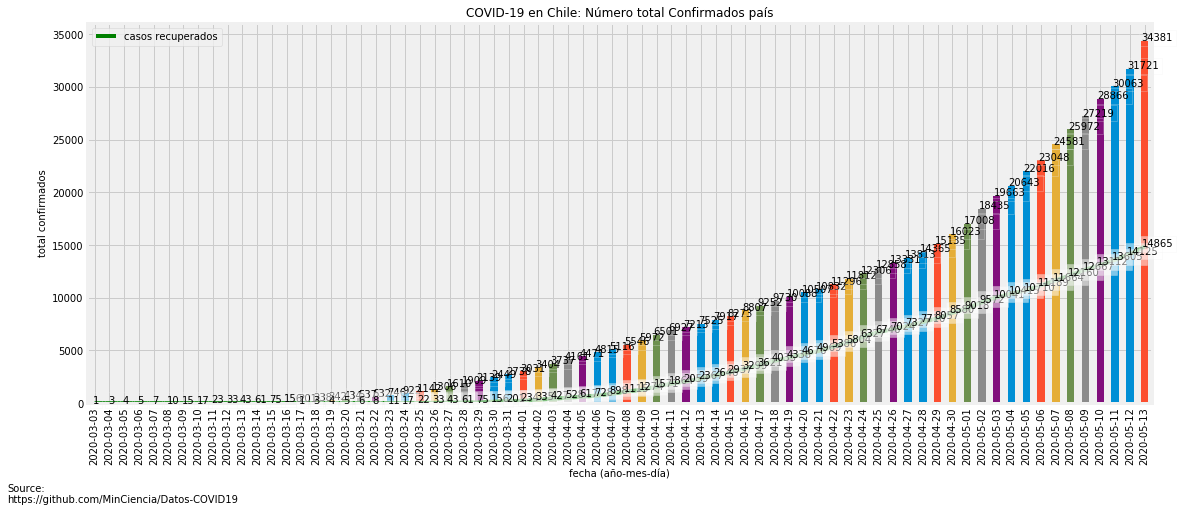

In [25]:
filename = date+'-COVID-19-Chile-TotalConfirmados-Activos-Rec-fallecidos.png'

fig, ax = plt.subplots(tight_layout=False,figsize=(17,7))

scale = 'linear'
fontsize = 10
dataCum.plot(ax=ax, kind="bar")
my_tags(dataCum,scale,fontsize,1.4,'none')

ax.plot(dataRec,color='green')
my_tags(dataRec,scale,fontsize,1.15,'white')

ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['casos recuperados'], loc = 'upper left')

ax.set_title(f'COVID-19 en Chile: Número total Confirmados país', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-80), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [26]:
first_date = '2020-04-29'


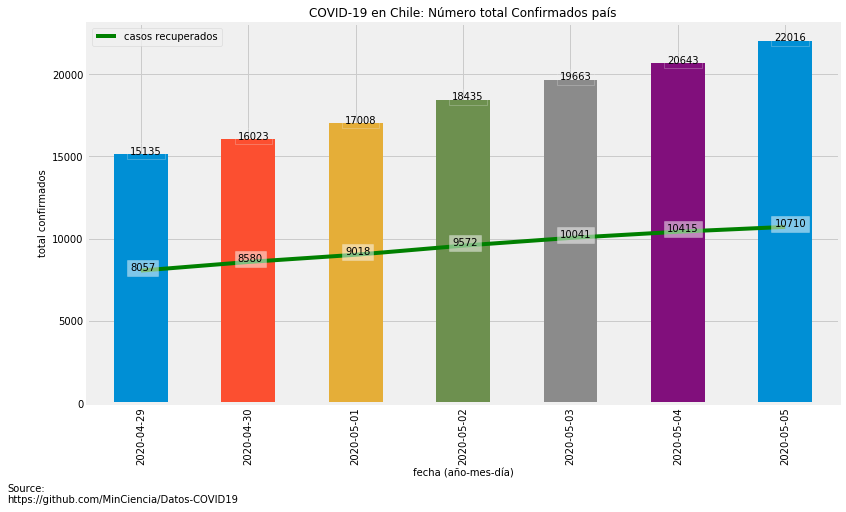

In [28]:
filename = first_date+'_'+date+'-COVID-19-Chile-TotalConfirmados-Activos-Rec-fallecidos.png'

fig, ax = plt.subplots(tight_layout=False,figsize=(12,7))

scale = 'linear'
fontsize = 10
dataCum[first_date:date].plot(ax=ax, kind="bar")
my_tags(dataCum[first_date:date],scale,fontsize,1.4,'none')

ax.plot(dataRec[first_date:date],color='green')
my_tags(dataRec[first_date:date],scale,fontsize,1.15,'white')

ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['casos recuperados'], loc = 'upper left')

ax.set_title(f'COVID-19 en Chile: Número total Confirmados país', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-80), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [29]:
first_date = '2020-03-03'


In [30]:
dataActivo = dataCum - dataRec - dataDeath

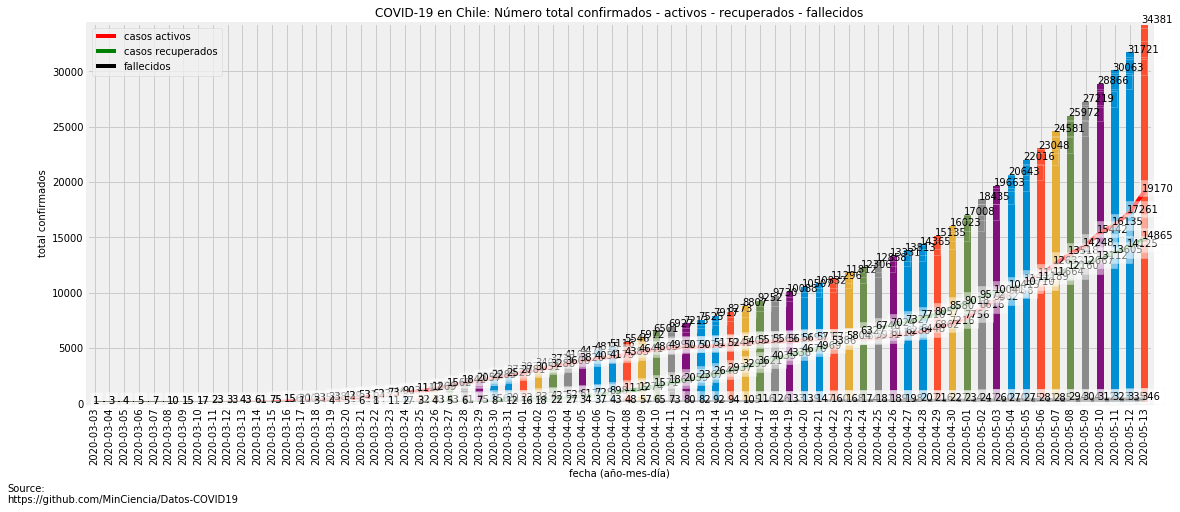

In [32]:
filename = date+'-COVID-19-Chile-TotalConfirmados-Activos-Rec-fallecidos.png'

fig, ax = plt.subplots(tight_layout=False,figsize=(17,7))

scale = 'linear'
fontsize = 10

dataCum.plot(ax=ax, kind="bar")
my_tags(dataCum,scale,fontsize,1.4,'none')

ax.plot(dataActivo,color='red')
my_tags(dataActivo,scale,fontsize,1.15,'white')

ax.plot(dataRec,color='green')
my_tags(dataRec,scale,fontsize,1.15,'white')

ax.plot(dataDeath,color='black')
my_tags(dataDeath,scale,fontsize,1.15,'white')

ax.set_ylim(0.9, dataCum.max())
ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['casos activos','casos recuperados', 'fallecidos'], loc = 'upper left')

ax.set_title(f'COVID-19 en Chile: Número total confirmados - activos - recuperados - fallecidos', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-80), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

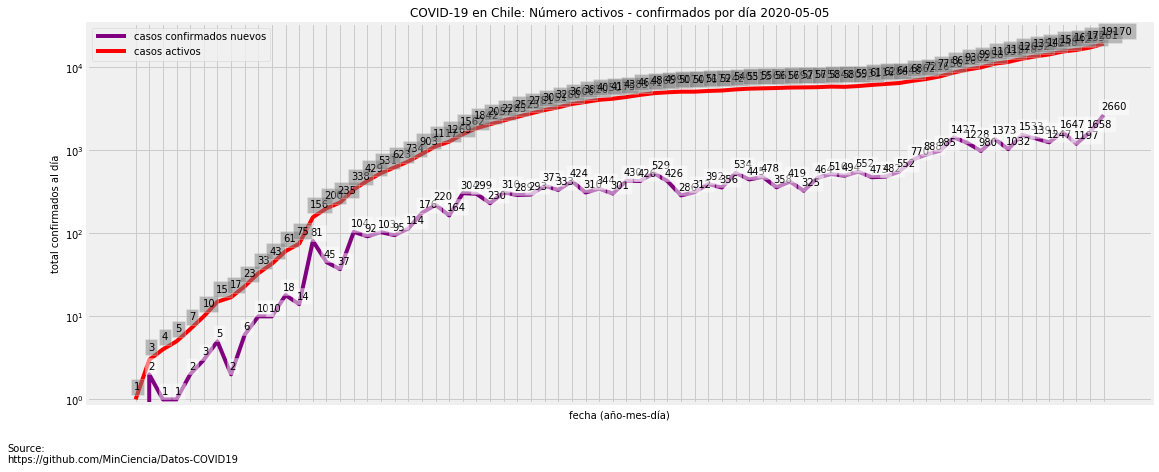

In [34]:
filename = date+'-COVID-19-Chile-Activos-ConfirmadosAlDia.png'

fig, ax = plt.subplots(tight_layout=False,figsize=(17,7))

scale = 'log'
fontsize = 10

dataNew.plot(ax=ax, color='purple')
my_tags(dataNew,scale,fontsize,1.15,'white')

ax.plot(dataActivo,color='red')
my_tags(dataActivo,scale,fontsize,1.3,'grey')

ax.set_ylim(0.9, dataCum.max())
plt.legend(fontsize='medium', labels=['casos confirmados nuevos','casos activos'], handlelength=3.0, loc = 'upper left')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número activos - confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados al día', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-40), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [35]:
dataNew = pd.DataFrame()
dataCum = pd.DataFrame()

In [36]:
for i in np.arange(total_days+1):
  date = (pd.to_datetime(first_date)+pd.DateOffset(i)).strftime('%Y-%m-%d')
 
  s = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/" + date + "-CasosConfirmados-totalRegional.csv"
  dataTotalRegion_by_date = pd.read_csv(s,index_col=0)

  columnas = list(dataTotalRegion.columns.values)

  if "Casos  nuevos" in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date['Casos  nuevos'].values
  elif 'Casos nuevos' in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date["Casos nuevos"].values
  elif " Casos nuevos" in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date[" Casos nuevos"].values

  if "Casos  nuevos totales" in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date['Casos  nuevos totales'].values
  elif 'Casos nuevos totales' in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date["Casos nuevos totales"].values
  elif " Casos nuevos totales" in dataTotalRegion_by_date.columns:
    dataNew[date] = dataTotalRegion_by_date[" Casos nuevos totales"].values

  if "Casos  totales" in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date['Casos  totales'].values
  elif 'Casos totales' in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date["Casos totales"].values
  elif " Casos totales" in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date[" Casos totales"].values
 
  if "Casos  totales  acumulados" in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date['Casos  totales  acumulados'].values
  elif 'Casos totales acumulados' in dataTotalRegion_by_date.columns:
    dataCum[date] = dataTotalRegion_by_date["Casos totales acumulados"].values

In [37]:
label_region = list()
temp = dataCum[date].values.tolist()
temp2 = dataTotalRegion.index.tolist()

for i in range(len(temp)):
  label_region.append(temp2[i]+' '+str(temp[i]))

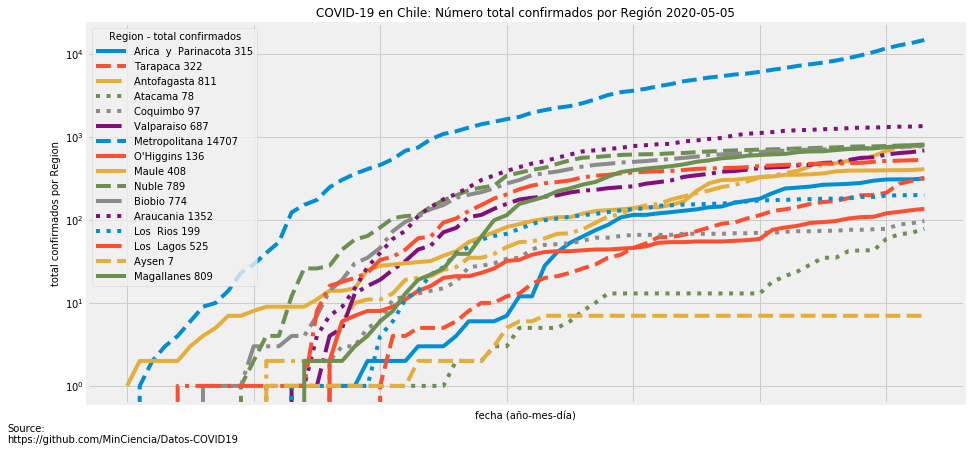

In [39]:
filename = date+'-COVID-19-Chile-TotalConfirmados-Region.png'

fig, ax = plt.subplots(tight_layout=False,figsize=(14,7))
lsRegion = ['-','--','-.',':',':','-.','--','-','-','--','-.',':',':','-.','--','-']

for i in np.arange(len(dataCum.index)-1):
  dataCum.iloc[i].plot(ax=ax,ls=lsRegion[i])

plt.legend(fontsize='medium', labels=label_region, handlelength=3.0, title='Region - total confirmados')

ax.set_yscale('log')

ax.set_title(f'COVID-19 en Chile: Número total confirmados por Región '+date, fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados por Region', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-20), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)
